In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

# Get CSV Files

In [2]:
df_2015 = pd.read_csv('data_source/2015.csv')
df_2016 = pd.read_csv('data_source/2016.csv')
df_2017 = pd.read_csv('data_source/2017.csv')
df_2018 = pd.read_csv('data_source/2018.csv')
df_2019 = pd.read_csv('data_source/2019.csv')

# Data preprocessing
- Changing all columns of each table to apprpriate names
- Common columns: ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
- Add year column
- Merge all tables

In [3]:
# check column names
# drop Region, Happiness Rank, Standard Error, Dystopia Residual columns
# change names where appropriate
df_2015.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [4]:
# drop Region, Happiness Rank, Lower Confidence Interval, 
# Upper Confidence Interval, Dystopia Residual columns
# change names where appropriate
df_2016.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [5]:
# drop Happiness.Rank, Whisker.high, 
# whisker.low, Dystopia Residual columns
# change names where appropriate
df_2017.columns.tolist()

['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual']

In [6]:
# drop Overall rank column
# change names where appropriate
df_2018.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [7]:
# drop Overall rank column
# change names where appropriate
df_2019.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [8]:
df_2015 = df_2015.drop(columns = ['Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual'])
df_2015.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
df_2015.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
df_2016 = df_2016.drop(columns = ['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
df_2016.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
df_2016.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [10]:
df_2017 = df_2017.drop(columns = ['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual'])
df_2017.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2017 = df_2017.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])
df_2017.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [11]:
df_2018 = df_2018.drop(columns = ['Overall rank'])
df_2018.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2018 = df_2018.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])   
df_2018.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [12]:
df_2019 = df_2019.drop(columns = ['Overall rank'])
df_2019.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2019 = df_2019.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])
df_2019.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


In [13]:
# Add Year column to each dataframe
df_2015["Year"] = 2015
df_2016["Year"] = 2016
df_2017["Year"] = 2017
df_2018["Year"] = 2018
df_2019["Year"] = 2019

In [14]:
# Combine 2015 and 2016 dataframes
df_2015_2016 = pd.concat([df_2015, df_2016], axis = 0)
df_2015_2016

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2016
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2016
154,Togo,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2016
155,Syria,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,2016


In [15]:
# Combine 2018 and 2019 dataframes
df_2018_2019 = pd.concat([df_2018, df_2019], axis = 0)
df_2018_2019

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity,Year
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2018
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2018
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2018
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2018
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2018
...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411,0.217,2019
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147,0.276,2019
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025,0.158,2019
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2019


In [16]:
#combining df_2015_2016 with df_2017 new table includes years 2015 2016 2017
df_2015_2016_2017 = pd.concat([df_2015_2016, df_2017], axis = 0)
df_2015_2016_2017

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity,Year
0,Switzerland,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2015
...,...,...,...,...,...,...,...,...,...
150,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,2017
151,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,2017
152,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,2017
153,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,2017


In [17]:
#combining df_2015_2016_2017 with df_2018_2019 new table includes years 2015 2016 2017
df = pd.concat([df_2015_2016_2017, df_2018_2019], axis = 0)
df

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


# Insert code to load into database on PgAdmin4

# Check Linearity
Test to see if there is a linear relationship between factors (Economy, Social Support, Life Expectancy, Freedom, Perceptions of Corruption and Generosity) and Happiness Score

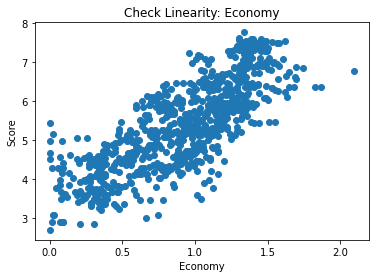

In [18]:
# Check Linearity: Economy vs Score
plt.scatter(df['Economy'], df['Score'])
plt.title('Check Linearity: Economy')
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Economy and Happiness Score

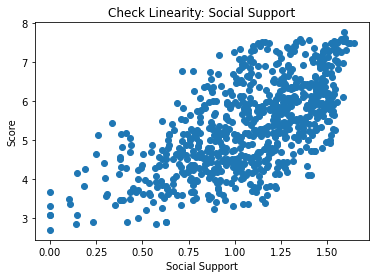

In [19]:
# Check Linearity: Social Support vs Score
plt.scatter(df['Social_Support'], df['Score'])
plt.title('Check Linearity: Social Support')
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Social Support and Happiness Score

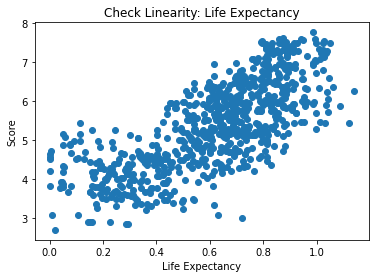

In [24]:
# Check Linearity: Life Expectancy vs Score
plt.scatter(df['Life_Expectancy'], df['Score'])
plt.title('Check Linearity: Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Life Expectancy and Happiness Score

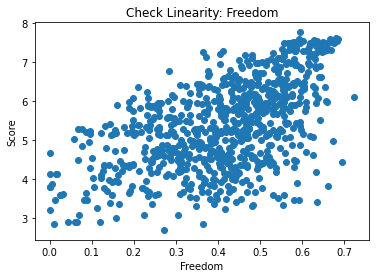

In [25]:
# Check Linearity: Freedom vs Score
plt.scatter(df['Freedom'], df['Score'])
plt.title('Check Linearity: Freedom')
plt.xlabel('Freedom')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Freedom and Happiness Score

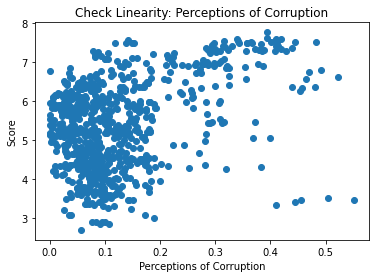

In [26]:
# Check Linearity: Perceptions of Corruption vs Score
plt.scatter(df['Perceptions_of_Corruption'], df['Score'])
plt.title('Check Linearity: Perceptions of Corruption')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Score')
plt.show()

Result: There is no linear relationship between Perceptions of Corruption and Happiness Score

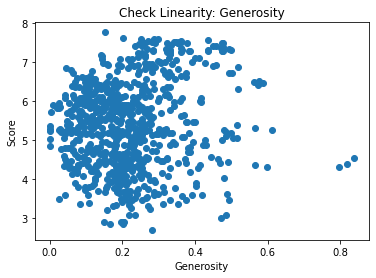

In [27]:
# Check Linearity: Generosity vs Score
plt.scatter(df['Generosity'], df['Score'])
plt.title('Check Linearity: Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

Result: There is no linear relationship between Generosity and Happiness Score

# Build Linear Regression Models
During this section, we'll build, train and test four linear regression models -- one for each factor that showed a linear relationship with happiness score: Economy, Social Support, Life Expectancy and Freedom. Reason being that linear regression only works when there is a linear relationship.

Model names are as follows:
- model_economy
- model_social_support
- model_life_expectancy
- model_freedom

We are using linear regression because we want to see how changing the score of each factor alters happiness scores. The befefit of using linear regression is that we can test how changing the score of each of the four factors, individually, affects the happiness score. The drawback of using linear regression is that we can't test how changing the scores of the four factors, at the same time, affects the happiness score. We'll build a multiple linear regression model in the next section to solve for this.

Test size for these models is 1/3 since this is a standard test size. We don't want the testing size to be too big that it takes away from training, yet we still need a sizable amount to test the model.

Mean absolute error is used to evaluate the models performances.

## Economy

In [29]:
# Split dependent and independent variables
X = df['Economy'].values.reshape(-1, 1)
X.shape

(782, 1)

In [30]:
y = df['Score'].values.reshape(-1, 1)

In [31]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [32]:
# Build Linear Regression model 
model_economy = LinearRegression()

In [33]:
# Fit Linear Regression to the Training set
model_economy.fit(X_train, y_train)

LinearRegression()

In [34]:
# Training Prediction
y_pred = model_economy.predict(X_train)
print(y_pred.shape)

(521, 1)


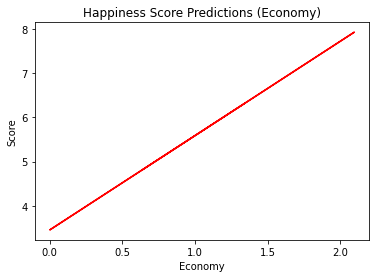

Coefficient:  [[2.13626222]]
Intercept:  [3.45064833]


In [35]:
# Plot Training Predictions 
plt.plot(X_train, y_pred, color='red')
plt.title("Happiness Score Predictions (Economy)")
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

print('Coefficient: ', model_economy.coef_)
print('Intercept: ', model_economy.intercept_)

In [36]:
# Predict happiness score by entering an economy score
Enter_Economy = 0.5

print ('Predicted Score: ', 
       model_economy.predict([[Enter_Economy]]))

Predicted Score:  [[4.51877944]]


In [37]:
# Evaluate model's performance with mean absolute error 
y_true = y
y_pred = model_economy.predict(X)
mean_absolute_error(y_true, y_pred)

0.5638476826486365

## Social Support

In [38]:
# Split dependent and independent variables
X = df['Social_Support'].values.reshape(-1, 1)
X.shape

(782, 1)

In [39]:
y = df['Score'].values.reshape(-1, 1)

In [40]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [41]:
# Build Linear Regression model 
model_social_support = LinearRegression()

In [42]:
# Fit Linear Regression to the Training set
model_social_support.fit(X_train, y_train)

LinearRegression()

In [43]:
# Training Prediction
y_pred = model_social_support.predict(X_train)
print(y_pred.shape)

(521, 1)


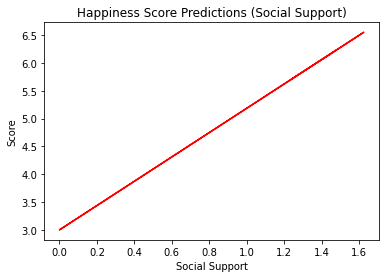

Coefficient:  [[2.18273104]]
Intercept:  [3.00294308]


In [45]:
# Plot Training Prediction 
plt.plot(X_train, y_pred, color='red')
plt.title("Happiness Score Predictions (Social Support)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

print('Coefficient: ', model_social_support.coef_)
print('Intercept: ', model_social_support.intercept_)

In [46]:
# Predict happiness score by entering a social support score
Enter_Social_Support = 0.5

print ('Predicted Score: ', 
       model_social_support.predict([[Enter_Social_Support]]))

Predicted Score:  [[4.0943086]]


In [47]:
# Evaluate model's performance with mean absolute error 
y_true = y
y_pred = model_social_support.predict(X)
mean_absolute_error(y_true, y_pred)

0.69836774422879

## Life Expectancy

In [48]:
# Split dependent and independent variables
X = df['Life_Expectancy'].values.reshape(-1, 1)
X.shape

(782, 1)

In [49]:
y = df['Score'].values.reshape(-1, 1)

In [50]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [51]:
# Build Linear Regression model 
model_life_expectancy = LinearRegression()

In [52]:
# Fit Linear Regression to the Training set
model_life_expectancy.fit(X_train, y_train)

LinearRegression()

In [53]:
# Training Prediction
y_pred = model_life_expectancy.predict(X_train)
print(y_pred.shape)

(521, 1)


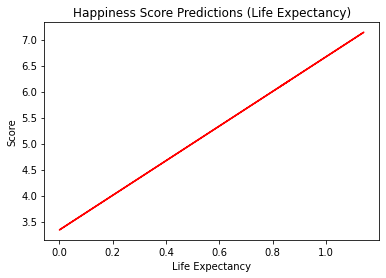

Coefficient:  [[3.33297778]]
Intercept:  [3.33878884]


In [54]:
# Plot Training Prediction 
plt.plot(X_train, y_pred, color='red')
plt.title("Happiness Score Predictions (Life Expectancy)")
plt.xlabel('Life Expectancy')
plt.ylabel('Score')
plt.show()

print('Coefficient: ', model_life_expectancy.coef_)
print('Intercept: ', model_life_expectancy.intercept_)

In [55]:
# Predict happiness score by entering a life expectancy score
Enter_Life_Expectancy = 0.5

print ('Predicted Score: ', 
       model_life_expectancy.predict([[Enter_Life_Expectancy]]))

Predicted Score:  [[5.00527773]]


In [56]:
# Evaluate model's performance with mean absolute error 
y_true = y
y_pred = model_life_expectancy.predict(X)
mean_absolute_error(y_true, y_pred)

0.6184457704211925

## Freedom

In [65]:
# Split dependent and independent variables
X = df['Freedom'].values.reshape(-1, 1)
X.shape

(782, 1)

In [66]:
y = df['Score'].values.reshape(-1, 1)

In [67]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [68]:
# Build Linear Regression model 
model_freedom = LinearRegression()

In [69]:
# Fit Linear Regression to the Training set
model_freedom.fit(X_train, y_train)

LinearRegression()

In [70]:
# Training Prediction
y_pred = model_freedom.predict(X_train)
print(y_pred.shape)

(521, 1)


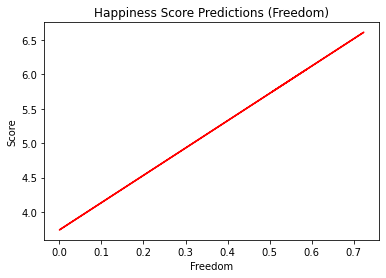

Coefficient:  [[3.9605872]]
Intercept:  [3.7419013]


In [71]:
# Plot Training Prediction 
plt.plot(X_train, y_pred, color='red')
plt.title("Happiness Score Predictions (Freedom)")
plt.xlabel('Freedom')
plt.ylabel('Score')
plt.show()

print('Coefficient: ', model_freedom.coef_)
print('Intercept: ', model_freedom.intercept_)

In [72]:
# Predict happiness score by entering a Freedom score
Enter_Freedom_Score = 0.5

print ('Predicted Score: ', 
       model_freedom.predict([[Enter_Freedom_Score]]))

Predicted Score:  [[5.7221949]]


In [73]:
# Evaluate model's performance with mean absolute error 
y_true = y
y_pred = model_freedom.predict(X)
mean_absolute_error(y_true, y_pred)

0.7746172424611798

# Build Multiple Linear Regression Model
We want to create a multiple linear regression model for all of the four factors that have a linear relationship with happiness score. This way, we can test how changing scores for each of these factors, at the same time, affect happiness score. The drawback to this model is that we can't validate the contribution that each factor has to the change in score. But this is why we created linear regression models for each factor. Problem solved!

Here's the model name:
- model_all

Test size for these models is 1/3 since this is a standard test size. We don't want the testing size to be too big that it takes away from training, yet we still need a sizable amount to test the model.

Mean absolute error is used to evaluate the models performances.

In [74]:
# Split dependent and independent variables
X = df[['Economy', 'Social_Support', 'Life_Expectancy', 'Freedom']]
X.shape

(782, 4)

In [75]:
y = df['Score']
y.shape

(782,)

In [76]:
# Build Multi Linear Regression model 
model_all = LinearRegression()
model_all.fit(X, y)

LinearRegression()

In [77]:
# Print Intercept & Coefficients
print(model_all.intercept_)
print(model_all.coef_)

2.2865969197545435
[1.19607457 0.53750325 1.01894591 1.92926241]


In [78]:
# Predict happiness score by entering all scores
Enter_Economy_Score = 0.5
Enter_Social_Support_Score = 0.5
Enter_Life_Expectancy_Score = 0.5
Enter_Freedom_Score = 0.5

print ('Predicted Score: ', 
       model_all.predict([[Enter_Economy_Score, 
                           Enter_Social_Support_Score, 
                           Enter_Life_Expectancy_Score, 
                           Enter_Freedom_Score]]))

Predicted Score:  [4.62748999]


In [79]:
# Evaluate model's performance with mean absolute error 
y_true = y
y_pred = model_all.predict(X)
mean_absolute_error(y_true, y_pred)

0.4408569643763473

# Neural Network
Using all 6 factors: 

Economy, Social_Support, Life_Expectancy, Freedom, Perceptions_of_Corruption, Generosity

### 2015

In [76]:
# Remove country and score from features data
y_2 = df_2015.Score
X_2 = df_2015.drop(columns=['Country', 'Score'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=69)

In [77]:
# define Linear Regression model 
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = model.score(X_test, y_test)
print(f" Linear regression model accuracy: {y_pred2:.3f}")

 Linear regression model accuracy: 0.769


In [78]:
# define basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(25, input_dim=6, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile the Sequential model together and customize metrics
nn_model.compile(loss='mse', optimizer='adam')

# train model
fit_model = nn_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, verbose=0)

Train: 0.363, Test: 0.348


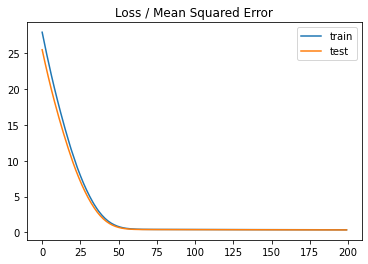

In [79]:
# evaluate the model
train_mse = nn_model.evaluate(X_train, y_train, verbose=0)
test_mse = nn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(fit_model.history['loss'], label='train')
plt.plot(fit_model.history['val_loss'], label='test')
plt.legend()
plt.show()

### 2016

In [80]:
# Remove country and score from features data
y_2 = df_2016.Score
X_2 = df_2016.drop(columns=['Country', 'Score'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=69)

In [81]:
# define Linear Regression model 
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = model.score(X_test, y_test)
print(f" Linear regression model accuracy: {y_pred2:.3f}")

 Linear regression model accuracy: 0.772


In [82]:
# define basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(25, input_dim=6, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile the Sequential model together and customize metrics
nn_model.compile(loss='mse', optimizer='adam')

# train model
fit_model = nn_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, verbose=0)

Train: 0.376, Test: 0.294


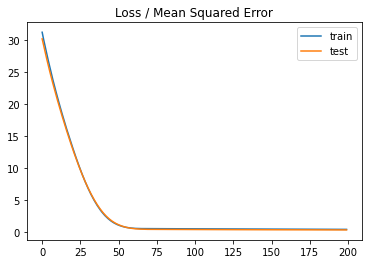

In [83]:
# evaluate the model
train_mse = nn_model.evaluate(X_train, y_train, verbose=0)
test_mse = nn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(fit_model.history['loss'], label='train')
plt.plot(fit_model.history['val_loss'], label='test')
plt.legend()
plt.show()

### 2017

In [84]:
# Remove country and score from features data
y_2 = df_2017.Score
X_2 = df_2017.drop(columns=['Country', 'Score'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=69)

In [85]:
# define Linear Regression model 
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = model.score(X_test, y_test)
print(f" Linear regression model accuracy: {y_pred2:.3f}")

 Linear regression model accuracy: 0.854


In [86]:
# define basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(25, input_dim=6, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile the Sequential model together and customize metrics
nn_model.compile(loss='mse', optimizer='adam')

# train model
fit_model = nn_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, verbose=0)

Train: 0.308, Test: 0.310


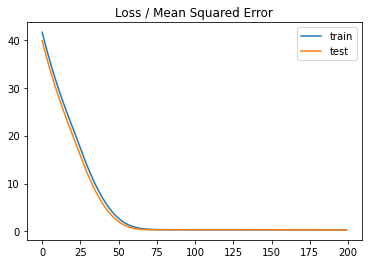

In [87]:
# evaluate the model
train_mse = nn_model.evaluate(X_train, y_train, verbose=0)
test_mse = nn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(fit_model.history['loss'], label='train')
plt.plot(fit_model.history['val_loss'], label='test')
plt.legend()
plt.show()

### 2018

In [88]:
# Remove country and score from features data
y_2 = df_2018.Score
X_2 = df_2018.drop(columns=['Country', 'Score'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=69)

In [89]:
# define Linear Regression model 
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = model.score(X_test, y_test)
print(f" Linear regression model accuracy: {y_pred2:.3f}")

 Linear regression model accuracy: 0.700


In [90]:
# define basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(25, input_dim=6, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile the Sequential model together and customize metrics
nn_model.compile(loss='mse', optimizer='adam')

# train model
fit_model = nn_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, verbose=0)

Train: 0.214, Test: 0.417


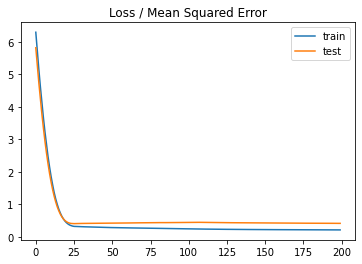

In [91]:
# evaluate the model
train_mse = nn_model.evaluate(X_train, y_train, verbose=0)
test_mse = nn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(fit_model.history['loss'], label='train')
plt.plot(fit_model.history['val_loss'], label='test')
plt.legend()
plt.show()

### 2019

In [92]:
# Remove country and score from features data
y_2 = df_2019.Score
X_2 = df_2019.drop(columns=['Country', 'Score'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=69)

In [93]:
# define Linear Regression model 
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = model.score(X_test, y_test)
print(f" Linear regression model accuracy: {y_pred2:.3f}")

 Linear regression model accuracy: 0.739


In [94]:
# define basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(25, input_dim=6, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile the Sequential model together and customize metrics
nn_model.compile(loss='mse', optimizer='adam')

# train model
fit_model = nn_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, verbose=0)

Train: 0.296, Test: 0.405


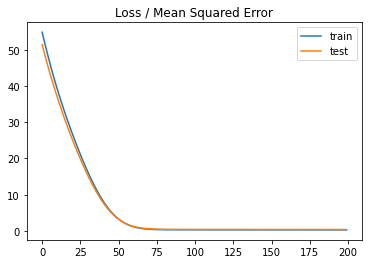

In [95]:
# evaluate the model
train_mse = nn_model.evaluate(X_train, y_train, verbose=0)
test_mse = nn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(fit_model.history['loss'], label='train')
plt.plot(fit_model.history['val_loss'], label='test')
plt.legend()
plt.show()